In [1]:
# import dependencies
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# read csvs into DF

org_profile = pd.read_csv('../Data/organization_profiles.csv')

tweets1 = pd.read_csv('../Data/tweets_all_revised2.csv')

# tweets2 = pd.read_excel('../Data/tweets_all_revised2.xlsx') # Not necessary

C:\Users\farha\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Summary stats of organizations followers and friends
org_profile[['followers_count', 'friends_count']].describe()

,followers_count,friends_count
count,86.000000,86.000000
mean,2643.151163,1071.383721
std,3835.771886,1078.873979
min,42.000000,21.000000
25%,567.750000,298.250000
50%,1544.500000,791.000000
75%,2951.500000,1513.250000
max,25052.000000,6858.000000


In [4]:
# Summary stats of favorites and retweets
tweets1[['favorite_count', 'retweet_count']].describe()

,favorite_count,retweet_count
count,184741.000000,1.847410e+05
mean,1.721989,8.308097e+01
std,4.911940,6.985665e+03
min,0.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,0.000000,1.000000e+00
75%,2.000000,3.000000e+00
max,578.000000,1.506563e+06


In [5]:
org_profile.head()

,Unnamed: 0,Organization Name,twitter_handle,screen_name,agency_catergory,followers_count,friends_count,location
0,0,Adults In Motion,@AIMkitchener,AIMkitchener,Disabilities,662,800,"Kitchener, Ontario"
1,1,African Family Revival Organization,@AFROKitchener,AFROKitchener,"Arts, Culture and Heritage",125,64,"Kitchener, Ontario"
2,2,Alzheimer Society of Waterloo Wellington,@alzsocww,alzsocww,Seniors,1376,432,"Waterloo Wellington, Ontario"
3,3,Big Brothers Big Sisters of Waterloo Region,@BBBSWR,BBBSWR,"Children, Youth and Family",2462,1551,Waterloo Region
4,4,Bridges to Belonging,@BtoBelonging,BtoBelonging,Disabilities,1432,1254,Waterloo Region


In [6]:
# value counts of agency category
org_profile['agency_catergory'].value_counts()

Community and Social Services        21
Arts, Culture and Heritage           11
Children, Youth and Family           10
Disabilities                         10
Sports, Recreation and Leisure        7
Health and Wellness                   4
Immigration and Settlement            3
Environment                           3
Library and Research                  2
Grant-Giving Foundation               2
Literacy and Skills Development       2
Employment                            2
Education Institution                 2
Criminal Justice and Civil Rights     2
Seniors                               2
Animals                               2
LGBTQ                                 1
Name: agency_catergory, dtype: int64

In [7]:
# followers grouped by agency category
followers_by_cat = org_profile.groupby(['agency_catergory']).sum()['followers_count']

Text(0.5, 0, 'Agency Categories')

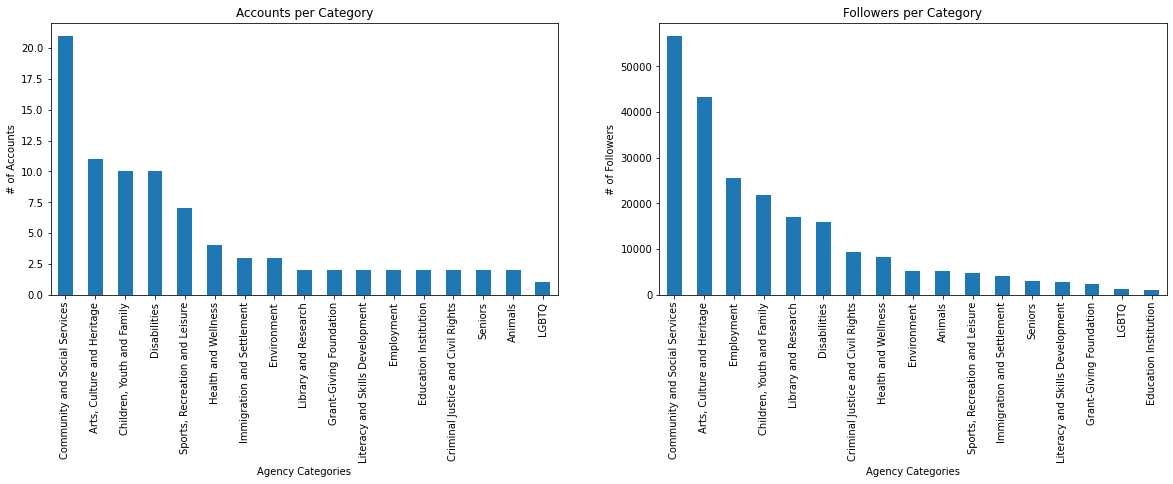

In [8]:
# Plot counts of agencies per category and sum of followers per category

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

org_profile['agency_catergory'].value_counts().plot.bar(ax=axes[0])
followers_by_cat.sort_values(ascending=False).plot.bar(ax=axes[1])

axes[0].set_title('Accounts per Category')
axes[0].set_ylabel('# of Accounts')
axes[0].set_xlabel('Agency Categories')

axes[1].set_title('Followers per Category')
axes[1].set_ylabel('# of Followers')
axes[1].set_xlabel('Agency Categories')

In [9]:
# Sort (top 10) organizations by follower count in descending order

org_profile.sort_values('followers_count', ascending=False).head(10)

,Unnamed: 0,Organization Name,twitter_handle,screen_name,agency_catergory,followers_count,friends_count,location
74,74,Uptown Waterloo BIA,@uptownwaterloo,uptownwaterloo,Employment,25052,423,"Waterloo, ON"
81,81,The Museum,@THEMUSEUM,THEMUSEUM,"Arts, Culture and Heritage",18095,6858,"Kitchener, Ontario, Canada"
40,40,Kitchener Public Library,@KitchLibrary,KitchLibrary,Library and Research,12630,3035,"Kitchener, Ontario, Canada"
42,42,Kitchener-Waterloo Art Gallery,@kwartgallery,kwartgallery,"Arts, Culture and Heritage",10448,3119,"Kitchener, Canada"
23,23,Food Bank of Waterloo Region,@FoodBankWatReg,FoodBankWatReg,Community and Social Services,8886,2091,Waterloo Region
32,32,John Howard Society of Waterloo-Wellington,@jhsontario,jhsontario,Criminal Justice and Civil Rights,6972,2655,"Ontario, Canada"
28,28,House of Friendship,@hofwatreg,hofwatreg,Community and Social Services,6672,1071,"Kitchener Waterloo, Ontario"
45,45,Kitchener-Waterloo Symphony Volunteer Committee,@kw_symphony,kw_symphony,"Arts, Culture and Heritage",6663,2424,"Kitchener, Ontario"
35,35,KidsAbility Centre for Child Development,@KidsAbility,KidsAbility,Disabilities,6406,2277,Ontario
52,52,Mennonite Central Committee Ontario (MCC),@mccorg,mccorg,Community and Social Services,6098,293,NaN


In [10]:
# Correlation between followers and friends?

org_profile['followers_count'].corr(org_profile['friends_count'])

0.5501928382719242

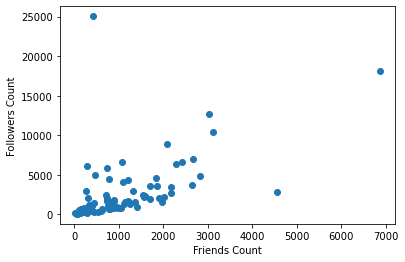

In [11]:
# plot the variables: followers as dependent(y-axis), friends as independent(x-axis)

plt.scatter(org_profile['friends_count'], org_profile['followers_count'])
plt.xlabel('Friends Count')
plt.ylabel('Followers Count')
plt.show()

## Regression model to test the correlation. Hypothesis: there is a random correlation between friends and followers

In [12]:
# Create the independent variable for the model
X = org_profile.friends_count.values.reshape(-1, 1)

In [13]:
X.shape

(86, 1)

In [14]:
# Create the dependent variable
y = org_profile.followers_count

In [15]:
# Create the model and fit it

model = LinearRegression()

In [16]:
model.fit(X, y)

LinearRegression()

In [17]:
y_pred = model.predict(X)
print(y_pred.shape)

(86,)


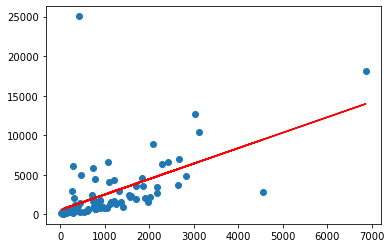

In [18]:
# plot the predictions
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [19]:
# Examine the parameters of the model: the slope and y-intercept
print(f'slope: {model.coef_}')
print(f'y-intercept: {model.intercept_}')

slope: [1.95612672]
y-intercept: 547.3888357821515


In [20]:
tweets1.head()

,tweet_id,user_id,created_at,screen_name,text,urls,favorite_count,retweet_count,URL,hashtags,has_media,is_quote,is_reply,is_retweet,Organization Name,text_clean
0,0,885747516,2021-02-26 17:59:51,AIMkitchener,🍅 What will your garden look like this year? 🪴...,['https://t.co/g1djW5JMVT'],2.0,0.0,https://twitter.com/i/web/status/1365360946378...,[],False,False,False,False,Adults In Motion,What will your garden look like this year \n...
1,1,885747516,2021-02-24 19:34:45,AIMkitchener,"Virtual connecting is not the next big thing, ...",['https://t.co/b1Ts6V60hS'],1.0,0.0,https://twitter.com/i/web/status/1364660054046...,[],False,False,False,False,Adults In Motion,Virtual connecting is not the next big thing i...
2,2,885747516,2021-02-15 18:14:22,AIMkitchener,“Treat your friends like family and your famil...,['https://t.co/jpFQ3K5oSK'],1.0,0.0,https://twitter.com/i/web/status/1361378331254...,[],False,False,False,False,Adults In Motion,“Treat your friends like family and your famil...
3,3,885747516,2021-02-01 17:54:56,AIMkitchener,🤗 Sending virtual Love Squeezes to anyone who ...,['https://t.co/zk4ZZm0cZa'],1.0,0.0,https://twitter.com/i/web/status/1356300010737...,"['VirtualHug', 'SpreadKindness', 'SpreadLove']",False,False,False,False,Adults In Motion,Sending virtual Love Squeezes to anyone who n...
4,4,885747516,2021-01-15 18:40:36,AIMkitchener,How are YOU getting active and outdoors?! Tell...,['https://t.co/eZB1kEPYUz'],1.0,0.0,NaN,[],True,False,False,False,Adults In Motion,How are YOU getting active and outdoors Tell u...


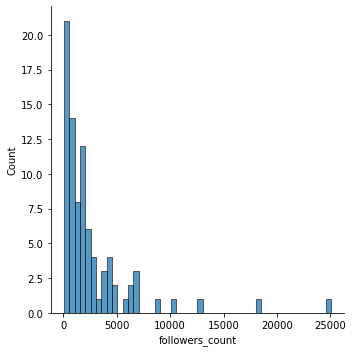

In [21]:
# Distribution of followers
sns.displot(org_profile['followers_count'], bins=50)

<AxesSubplot:xlabel='friends_count', ylabel='Count'>

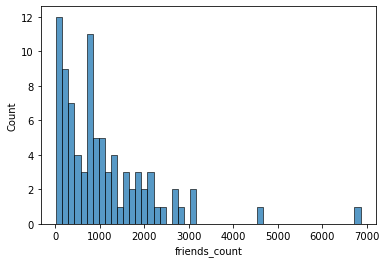

In [22]:
# plot distribution of friends
sns.histplot(org_profile['friends_count'], bins=50)

In [23]:
# Get the value count of favorites
fav_count = pd.Series(tweets1['favorite_count'].value_counts())
fav_count

0.0      107645
1.0       25732
2.0       14643
3.0        9522
4.0        6497
          ...  
578.0         1
283.0         1
203.0         1
192.0         1
79.0          1
Name: favorite_count, Length: 121, dtype: int64

Text(0.5, 1.0, 'Frequency of Favorites')

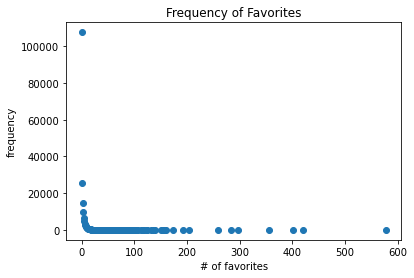

In [24]:
# Plot favorites
plt.scatter(x=fav_count.index, y=fav_count)
plt.xlabel('# of favorites')
plt.ylabel('frequency')
plt.title('Frequency of Favorites')

In [25]:
# Get the value count of retweets
retweet_count = pd.Series(tweets1['retweet_count'].value_counts())
retweet_count

0.0         67558
1.0         40372
2.0         23973
3.0         14756
4.0          9257
            ...  
5205.0          1
325.0           1
927427.0        1
5197.0          1
503.0           1
Name: retweet_count, Length: 1045, dtype: int64

Text(0.5, 1.0, 'Frequency of retweets')

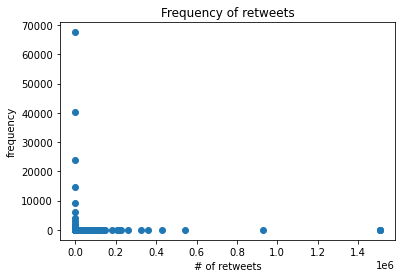

In [26]:
# Plot retweets
plt.scatter(retweet_count.index, retweet_count)
plt.xlabel('# of retweets')
plt.ylabel('frequency')
plt.title('Frequency of retweets')

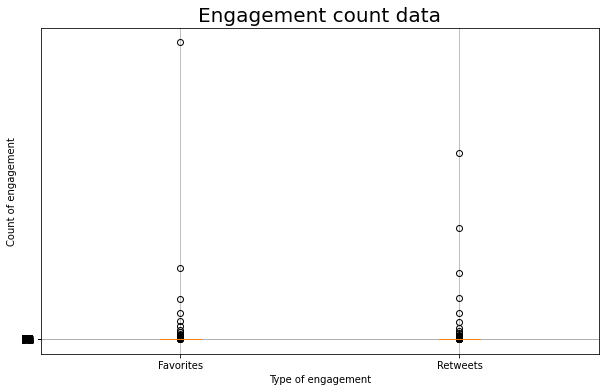

In [27]:
# Create a box plot of favorites and retweets
x_labels = ['Favorites', 'Retweets']
engagement_count_data = [fav_count, retweet_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Engagement count data', fontsize=20)
ax.set_ylabel('Count of engagement')
ax.set_xlabel('Type of engagement')
ax.boxplot(engagement_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 100))
ax.grid()

In [28]:
# check data of the outliers in favorite count
tweets1[tweets1['favorite_count'] > 300]

,tweet_id,user_id,created_at,screen_name,text,urls,favorite_count,retweet_count,URL,hashtags,has_media,is_quote,is_reply,is_retweet,Organization Name,text_clean
88051,88055,425118862,2021-01-19 16:34:03,KitchLibrary,"It's official! No more overdue fines, ever! 🙌🥳...",['https://t.co/SVlWM83PLJ'],578.0,142.0,https://twitter.com/i/web/status/1351568617226...,[],False,False,False,False,Kitchener Public Library,Its official No more overdue fines ever \n\nWe...
88089,88093,425118862,2021-01-11 15:45:09,KitchLibrary,Be careful what you wish for 😉\n\nPictured: 85...,['https://t.co/aPCfFSemz0'],355.0,23.0,https://twitter.com/i/web/status/1348657207932...,[],False,False,False,False,Kitchener Public Library,Be careful what you wish for \n\nPictured 85 i...
89111,89115,425118862,2020-03-22 18:01:04,KitchLibrary,Thank you to everyone who reached out to us ab...,['https://t.co/qy3U6EBYvU'],420.0,76.0,https://twitter.com/i/web/status/1241786989168...,['kwawesome'],False,True,False,False,Kitchener Public Library,Thank you to everyone who reached out to us ab...
89562,89566,425118862,2019-11-04 14:51:57,KitchLibrary,Access to menstrual products just got a little...,['https://t.co/ubab4HOStJ'],401.0,67.0,https://twitter.com/i/web/status/1191367483363...,[],False,False,False,False,Kitchener Public Library,Access to menstrual products just got a little...


In [29]:
# check the outlier in retweet count
tweets1[tweets1['retweet_count'] > 900000]

,tweet_id,user_id,created_at,screen_name,text,urls,favorite_count,retweet_count,URL,hashtags,has_media,is_quote,is_reply,is_retweet,Organization Name,text_clean
2040,2040,756239429904334848,2017-08-17 20:13:51,AFROKitchener,"RT @BarackObama: ""No one is born hating anothe...",['https://t.co'],0.0,1506563.0,NaN,[],False,False,False,True,African Family Revival Organization,No one is born hating another person because o...
34308,34308,237301381,2017-08-17 02:08:05,ajustcommunity,"RT @BarackObama: ""No one is born hating anothe...",['https://t.co'],0.0,1506561.0,NaN,[],False,False,False,True,Community Justice Initiatives,No one is born hating another person because o...
47716,47718,930117559,2017-08-16 03:30:15,EAFWR,"RT @BarackObama: ""No one is born hating anothe...",['https://t.co'],0.0,1506560.0,NaN,[],False,False,False,True,Extend-A-Family Waterloo Region,No one is born hating another person because o...
104713,104717,1390797326,2018-06-01 17:18:28,KWMLA,RT @RandallTime: If the Cleveland Cavaliers wi...,[],0.0,927427.0,NaN,[],False,False,False,True,KW Minor Lacrosse Association,If the Cleveland Cavaliers win the 2018 NBA fi...


## What are the common themes for posts that drive engagement?

We will measure engagement by the count of favorites and retweets

In [30]:
# Define threshhold for engagement at 3rd quartile
high_engagement_df = tweets1[(tweets1['favorite_count'] > (tweets1['favorite_count'].quantile(q=0.75))) 
                             | (tweets1['retweet_count'] > (tweets1['retweet_count'].quantile(q=0.75)))]

In [31]:
# Check for duplication
high_engagement_df.duplicated().any()

False

Text(0.09, 0.5, 'Retweets Count')

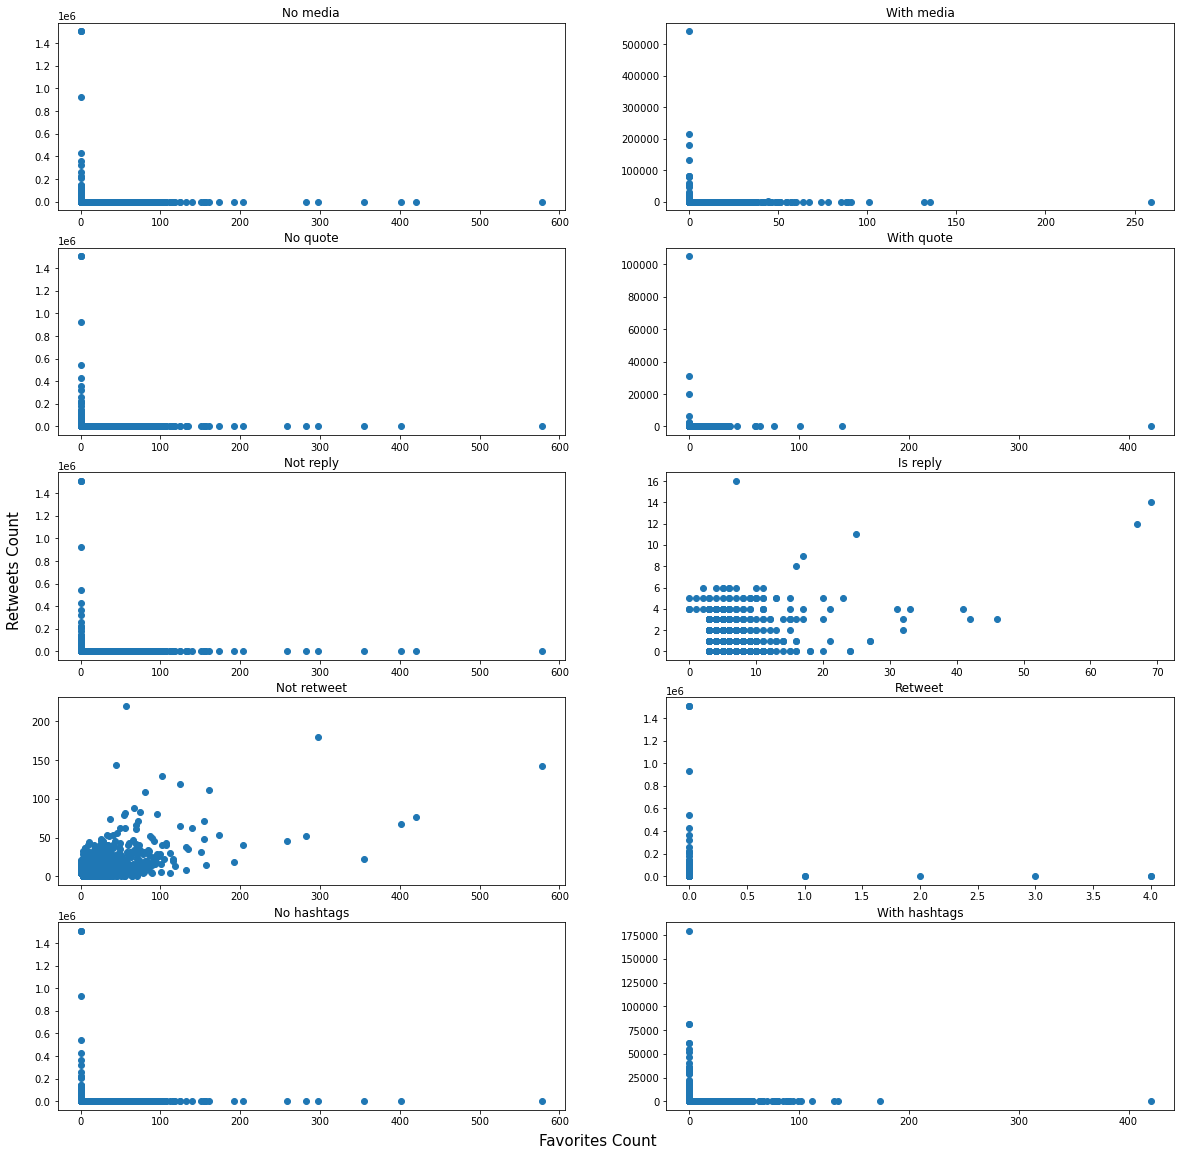

In [32]:
# Plot potential factors that impact enagement
fig, axes = plt.subplots(5, 2, figsize=(20,20))

axes[0, 0].scatter(x='favorite_count', y='retweet_count', data=high_engagement_df[high_engagement_df['has_media'] == False])
axes[0, 1].scatter(x='favorite_count', y='retweet_count', data=high_engagement_df[high_engagement_df['has_media'] == True])
axes[1, 0].scatter(x='favorite_count', y='retweet_count', data=high_engagement_df[high_engagement_df['is_quote'] == False])
axes[1, 1].scatter(x='favorite_count', y='retweet_count', data=high_engagement_df[high_engagement_df['is_quote'] == True])
axes[2, 0].scatter(x='favorite_count', y='retweet_count', data=high_engagement_df[high_engagement_df['is_reply'] == False])
axes[2, 1].scatter(x='favorite_count', y='retweet_count', data=high_engagement_df[high_engagement_df['is_reply'] == True])
axes[3, 0].scatter(x='favorite_count', y='retweet_count', data=high_engagement_df[high_engagement_df['is_retweet'] == False])
axes[3, 1].scatter(x='favorite_count', y='retweet_count', data=high_engagement_df[high_engagement_df['is_retweet'] == True])
axes[4, 0].scatter(x='favorite_count', y='retweet_count', data=high_engagement_df[high_engagement_df['hashtags'] == '[]'])
axes[4, 1].scatter(x='favorite_count', y='retweet_count', data=high_engagement_df[high_engagement_df['hashtags'] != '[]'])


# labels and annotations
axes[0, 0].set_title('No media')
axes[0, 1].set_title('With media')
axes[1, 0].set_title('No quote')
axes[1, 1].set_title('With quote')
axes[2, 0].set_title('Not reply')
axes[2, 1].set_title('Is reply')
axes[3, 0].set_title('Not retweet')
axes[3, 1].set_title('Retweet')
axes[4, 0].set_title('No hashtags')
axes[4, 1].set_title('With hashtags')

fig.text(0.5, 0.1, 'Favorites Count', ha='center', fontsize=15)
fig.text(0.09, 0.5, 'Retweets Count', va='center', rotation='vertical', fontsize=15)

## Which posts have the maximum engagement?

In [33]:
# posts with most retweets
high_engagement_df.sort_values('retweet_count', ascending=False).head(10)

,tweet_id,user_id,created_at,screen_name,text,urls,favorite_count,retweet_count,URL,hashtags,has_media,is_quote,is_reply,is_retweet,Organization Name,text_clean
2040,2040,756239429904334848,2017-08-17 20:13:51,AFROKitchener,"RT @BarackObama: ""No one is born hating anothe...",['https://t.co'],0.0,1506563.0,NaN,[],False,False,False,True,African Family Revival Organization,No one is born hating another person because o...
34308,34308,237301381,2017-08-17 02:08:05,ajustcommunity,"RT @BarackObama: ""No one is born hating anothe...",['https://t.co'],0.0,1506561.0,NaN,[],False,False,False,True,Community Justice Initiatives,No one is born hating another person because o...
47716,47718,930117559,2017-08-16 03:30:15,EAFWR,"RT @BarackObama: ""No one is born hating anothe...",['https://t.co'],0.0,1506560.0,NaN,[],False,False,False,True,Extend-A-Family Waterloo Region,No one is born hating another person because o...
104713,104717,1390797326,2018-06-01 17:18:28,KWMLA,RT @RandallTime: If the Cleveland Cavaliers wi...,[],0.0,927427.0,NaN,[],False,False,False,True,KW Minor Lacrosse Association,If the Cleveland Cavaliers win the 2018 NBA fi...
112921,112925,97226830,2020-06-04 19:59:04,mccorg,RT @Levance_: Know the difference. https://t.c...,['https://t.co/einoHMXvHn'],0.0,542365.0,NaN,[],True,False,False,True,Mennonite Central Committee Ontario (MCC),Know the difference
135266,135270,247092883,2017-08-13 13:55:38,SASCWR,"RT @BarackObama: ""People must learn to hate, a...",[],0.0,430275.0,NaN,[],False,False,False,True,Sexual Assault Support Centre of Waterloo Region,People must learn to hate and if they can lear...
135526,135530,247092883,2017-01-29 14:31:03,SASCWR,RT @JustinTrudeau: To those fleeing persecutio...,[],0.0,362018.0,NaN,[],False,False,False,True,Sexual Assault Support Centre of Waterloo Region,To those fleeing persecution terror amp war Ca...
33891,33891,237301381,2018-01-16 11:58:33,ajustcommunity,RT @BarackObama: Dr. King was 26 when the Mont...,[],0.0,323672.0,NaN,[],False,False,False,True,Community Justice Initiatives,Dr King was 26 when the Montgomery bus boycott...
48973,48975,407150796,2017-01-26 02:55:00,Fiddlesticks_CC,"RT @TheEllenShow: For every retweet of this, B...",[],0.0,259988.0,NaN,[],False,False,False,True,Fiddlesticks Community Centre,For every retweet of this Bell will donate 5 c...
96101,96105,2484729745,2018-08-21 14:58:54,KWMulticultural,RT @autumnbragwell: let’s settle this:\nDoes p...,[],0.0,225045.0,NaN,[],False,False,False,True,Kitchener-Waterloo Multicultural Centre,let’s settle this\nDoes pineapple belong on pi...


In [34]:
# posts with most favourites
high_engagement_df.sort_values('favorite_count', ascending=False).head(10)

,tweet_id,user_id,created_at,screen_name,text,urls,favorite_count,retweet_count,URL,hashtags,has_media,is_quote,is_reply,is_retweet,Organization Name,text_clean
88051,88055,425118862,2021-01-19 16:34:03,KitchLibrary,"It's official! No more overdue fines, ever! 🙌🥳...",['https://t.co/SVlWM83PLJ'],578.0,142.0,https://twitter.com/i/web/status/1351568617226...,[],False,False,False,False,Kitchener Public Library,Its official No more overdue fines ever \n\nWe...
89111,89115,425118862,2020-03-22 18:01:04,KitchLibrary,Thank you to everyone who reached out to us ab...,['https://t.co/qy3U6EBYvU'],420.0,76.0,https://twitter.com/i/web/status/1241786989168...,['kwawesome'],False,True,False,False,Kitchener Public Library,Thank you to everyone who reached out to us ab...
89562,89566,425118862,2019-11-04 14:51:57,KitchLibrary,Access to menstrual products just got a little...,['https://t.co/ubab4HOStJ'],401.0,67.0,https://twitter.com/i/web/status/1191367483363...,[],False,False,False,False,Kitchener Public Library,Access to menstrual products just got a little...
88089,88093,425118862,2021-01-11 15:45:09,KitchLibrary,Be careful what you wish for 😉\n\nPictured: 85...,['https://t.co/aPCfFSemz0'],355.0,23.0,https://twitter.com/i/web/status/1348657207932...,[],False,False,False,False,Kitchener Public Library,Be careful what you wish for \n\nPictured 85 i...
79263,79267,229574255,2019-02-27 12:01:37,KidsAbility,"With bullying in schools, workplaces, homes an...",['https://t.co/V6jBXVtoev'],297.0,180.0,https://twitter.com/i/web/status/1100727651889...,[],False,False,False,False,KidsAbility Centre for Child Development,With bullying in schools workplaces homes and ...
89572,89576,425118862,2019-10-25 13:38:24,KitchLibrary,Coming soon! We’re excited to announce that st...,['https://t.co/CGkPZJURkN'],283.0,52.0,https://twitter.com/i/web/status/1187725094694...,[],False,False,False,False,Kitchener Public Library,Coming soon We’re excited to announce that sta...
90010,90014,425118862,2019-06-10 17:59:38,KitchLibrary,"Do people even USE libraries anymore?! Yes, an...",['https://t.co/JCOAHQIAAB'],259.0,46.0,NaN,[],True,False,False,False,Kitchener Public Library,Do people even USE libraries anymore Yes and t...
89372,89376,425118862,2020-01-11 15:27:27,KitchLibrary,Rainy days are perfect for curling up with a g...,['https://t.co/xtyjF3KtcS'],203.0,40.0,https://twitter.com/i/web/status/1216018791215...,[],False,False,False,False,Kitchener Public Library,Rainy days are perfect for curling up with a g...
60929,60933,217184053,2020-06-19 19:42:25,hofwatreg,"This week, we lost a bright light at House of ...",['https://t.co/1Fs9qbRfxv'],192.0,18.0,https://twitter.com/i/web/status/1274065015134...,[],False,False,False,False,House of Friendship,This week we lost a bright light at House of F...
94412,94416,78378682,2019-04-15 18:47:15,kwartgallery,"Heartbroken at the devastation of #NotreDame, ...",['https://t.co/UyR7KjdWd3'],174.0,53.0,https://twitter.com/i/web/status/1117861964527...,['NotreDame'],False,False,False,False,Kitchener-Waterloo Art Gallery,Heartbroken at the devastation of NotreDame a ...


## Would a different engagement strategy be useful for different types of nonprofits?

All NGO's seem to demonstrate similar patters of tweeting. They mostly retweet, which does not increase engagement. Suggestion is to actively engage with other popular accounts by commenting and replying. 

In [35]:
merged_high_eng_df = pd.merge(high_engagement_df, org_profile[['screen_name','agency_catergory', 'followers_count', 'friends_count']], how='left', on='screen_name')
# merged_high_eng_df.tail()

Text(0, 0.5, 'Retweet Count')

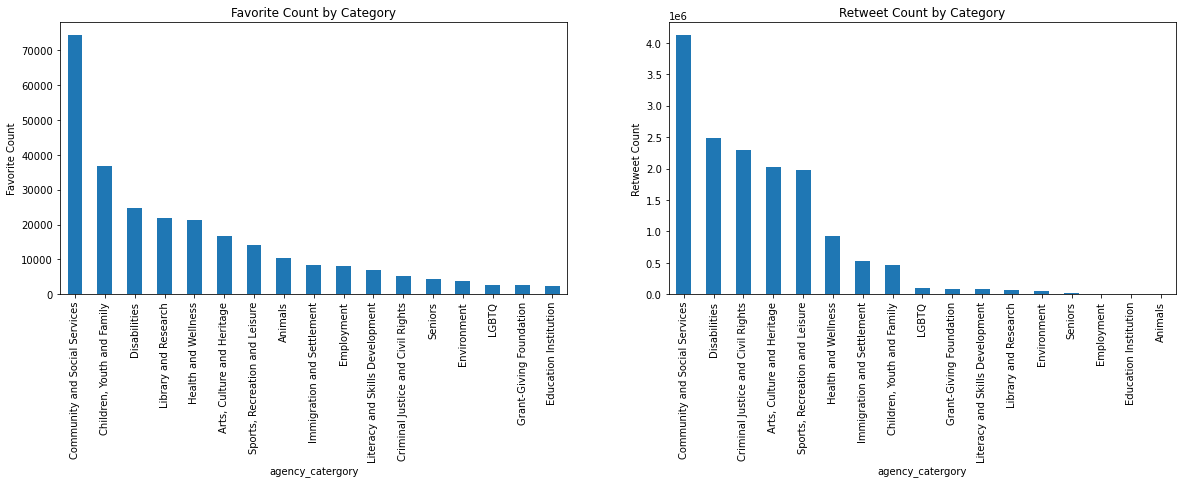

In [36]:
# Plot the favorite and retweet counts by category
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

merged_high_eng_df.groupby(['agency_catergory']).sum()['favorite_count'].sort_values(ascending=False).plot.bar(ax=ax1)
merged_high_eng_df.groupby(['agency_catergory']).sum()['retweet_count'].sort_values(ascending=False).plot.bar(ax=ax2)

ax1.set_title('Favorite Count by Category')
ax2.set_title('Retweet Count by Category')

ax1.set_ylabel('Favorite Count')
ax2.set_ylabel('Retweet Count')

Text(0.5, 1.0, 'Tweets that are not and are retweets')

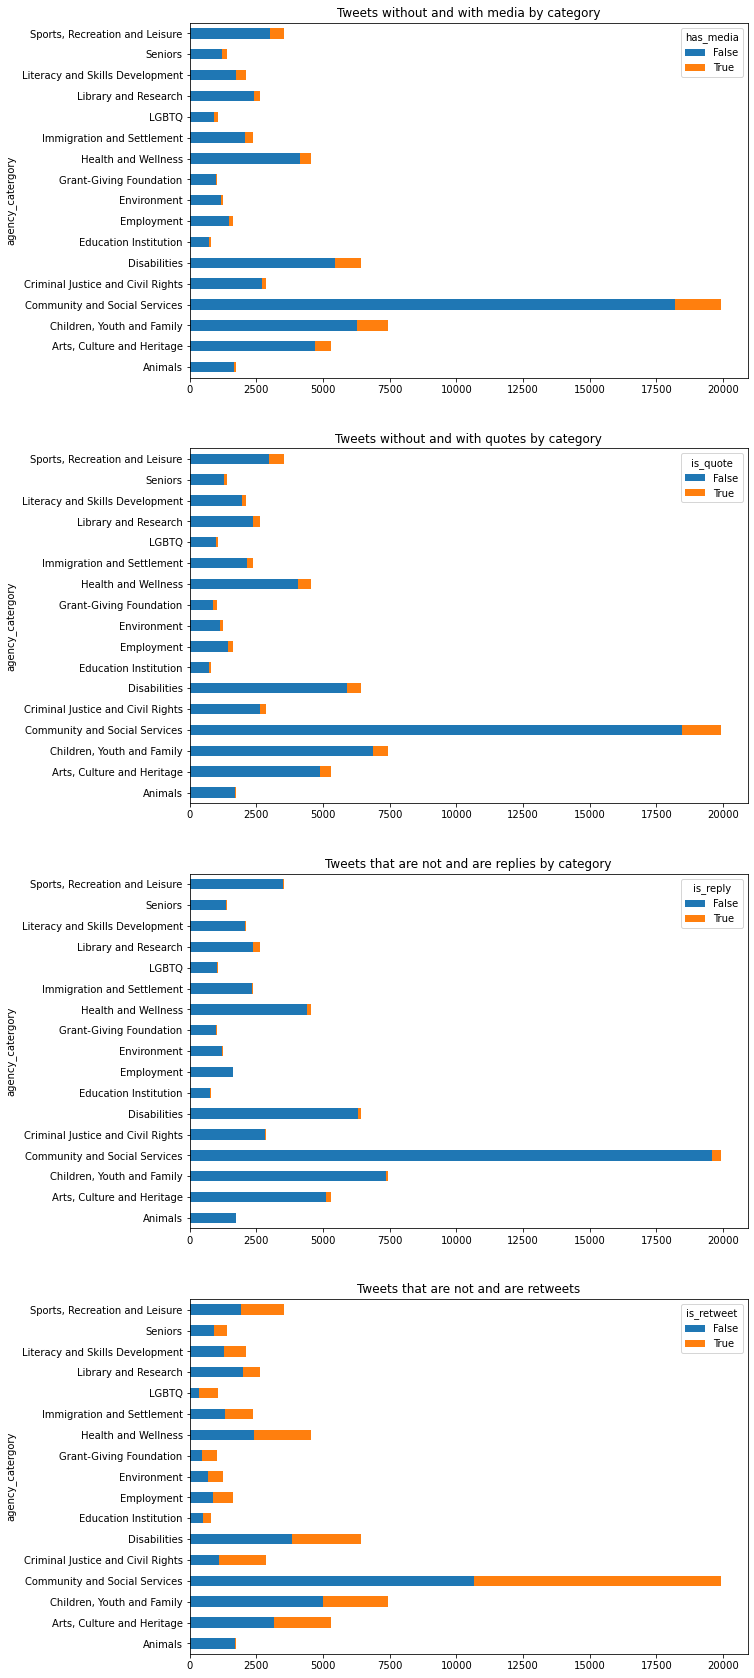

In [37]:
# Need to count True and False has_media etc for each category to understand difference in their approaches 
fig, axes = plt.subplots(4, figsize=(10, 30))

merged_high_eng_df.groupby(['agency_catergory'])['has_media'].value_counts().unstack().plot.barh(stacked=True, ax=axes[0])
merged_high_eng_df.groupby(['agency_catergory'])['is_quote'].value_counts().unstack().plot.barh(stacked=True, ax=axes[1])
merged_high_eng_df.groupby(['agency_catergory'])['is_reply'].value_counts().unstack().plot.barh(stacked=True, ax=axes[2])
merged_high_eng_df.groupby(['agency_catergory'])['is_retweet'].value_counts().unstack().plot.barh(stacked=True, ax=axes[3])

# annotations, titles, etc
axes[0].set_title('Tweets without and with media by category')
axes[1].set_title('Tweets without and with quotes by category')
axes[2].set_title('Tweets that are not and are replies by category')
axes[3].set_title('Tweets that are not and are retweets')


## Does a certain time of day, week, or month generate more engagement?

* Best hours: Afternoons between 1PM and 4PM
* Best Days: Weekdays with peaks on Wed and Thu
* Best months: April, May, June, September, November


In [38]:
# Convert date column to datetime
merged_high_eng_df['created_at'] = pd.to_datetime(merged_high_eng_df['created_at'])

In [39]:
# Create cross-tabulations by hour, day, month and favorite count
favorite_counts_by_hour = pd.crosstab(merged_high_eng_df['created_at'].dt.hour, 
                                      merged_high_eng_df['favorite_count'])

favorite_counts_by_day = pd.crosstab(merged_high_eng_df['created_at'].dt.weekday, 
                                     merged_high_eng_df['favorite_count'])

favorite_counts_by_month = pd.crosstab(merged_high_eng_df['created_at'].dt.month, 
                                       merged_high_eng_df['favorite_count'])

Text(0.5, 0, 'Favorite Count')

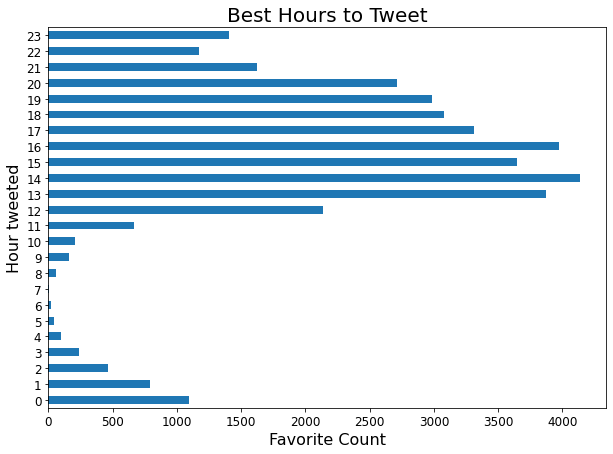

In [138]:
# Drop the column with 0 favorites and plot the sum of favorites by hour
favorite_counts_by_hour.drop(0.0, axis=1).sum(axis=1).plot.barh(figsize=(10,7), fontsize='12')

plt.title('Best Hours to Tweet', fontsize=20)
plt.ylabel('Hour tweeted', fontsize=16)
plt.xlabel('Favorite Count', fontsize=16)

Text(0, 0.5, 'Weekday')

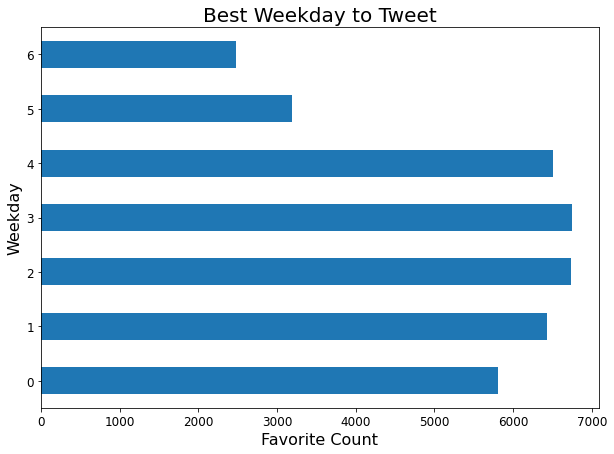

In [144]:
# Drop the column with 0 favorites and plot the sum favorites by weekday
favorite_counts_by_day.drop(0.0, axis=1).sum(axis=1).plot.barh(figsize=(10,7), fontsize=12)

plt.title('Best Weekday to Tweet', fontsize=20)
plt.xlabel('Favorite Count', fontsize=16)
plt.ylabel('Weekday', fontsize=16)

Text(0, 0.5, 'Month')

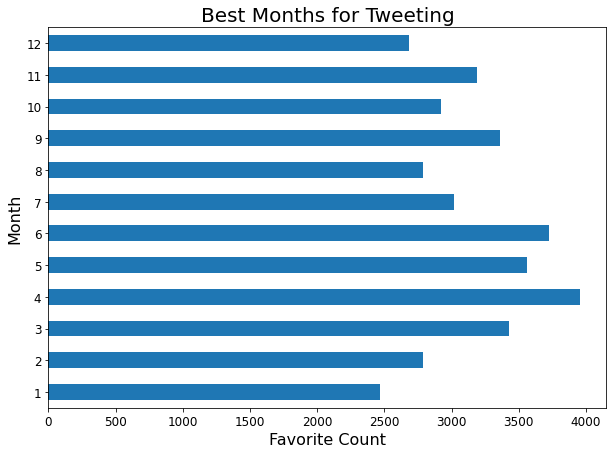

In [145]:
# drop the column with 0 favorites and plot the sum of favorites by month
favorite_counts_by_month.drop(0.0, axis=1).sum(axis=1).plot.barh(figsize=(10,7), fontsize='12')

plt.title('Best Months for Tweeting', fontsize=20)
plt.xlabel('Favorite Count', fontsize=16)
plt.ylabel('Month', fontsize=16)

## Are there keywords or hashtags that drive more engagement, like free/new/donate/help/volunteer/etc?

In the comparison graph above, we learned that there is no significant difference in engagement between tweets with hashtags and ones without

In [43]:
# Check hashtag frequency
tweets1['hashtags'].value_counts()

[]                                        126050
['kwawesome']                                606
['RaisingHealthyKids']                       418
['COVID19']                                  415
['DailyHealthTip']                           393
                                           ...  
['ForwardPromise']                             1
['castingcall']                                1
['KWAwesome', 'WRTalk', '12Days4Good']         1
['LittleMushroomCatering']                     1
['BeatHunger']                                 1
Name: hashtags, Length: 24328, dtype: int64

In [118]:
# Create a Series with sum of favorite counts grouped by hashtags
hashtag_favs = tweets1.groupby(['hashtags']).sum()['favorite_count'].sort_values(ascending=False)

<AxesSubplot:title={'center':'Popular Hashtags'}, ylabel='hashtags'>

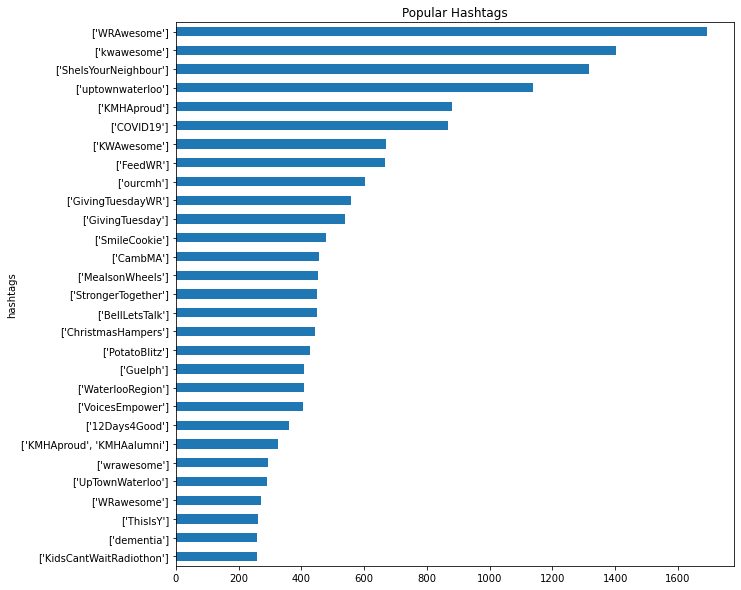

In [116]:
# Plot the most popular hashtags
hashtag_favs[1:30].sort_values().plot(kind='barh', y='Hashtags', x='Favorite Count', title='Popular Hashtags', figsize=(10, 10))